## LENDING CLUB CASE STUDY

### CONTENT

###  BUSINESS OBJECTIVE & PROBLEM STATEMENT

Business Objective:
  Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors   looking to lend money and make a return. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
          If the applicant is likely to repay the loan, then not approving the loan results in a loss of                  business to the company
          If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving              the loan may lead to a financial loss for the company


Problem Statement:
Identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)

In [2]:
loan = pd.read_csv('loan.csv', low_memory=False)

### DATA REVIEW & CLEANSING

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loan.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
#Review the Null value %
round(loan.isnull().sum()/len(loan)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
null_df = pd.DataFrame(loan.isnull().sum()/len(loan)).reset_index()

In [9]:
null_df

,index,0
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
5,term,0.000000
6,int_rate,0.000000
7,installment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


In [10]:
#remove the null values above 75% from loan dataframe
null_df = pd.DataFrame(loan.isnull().sum()/len(loan)).reset_index()
null_list = list(null_df['index'][null_df[0]>= 0.75])
null_list

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [11]:
loan.drop(null_list,axis=1,inplace=True)

In [12]:
# 32% null values in 'Desc' There may be some useful dates of account openings here. However, not considering
# this since ~30% of values are not available and cannot be imputed
# Emp title has 6.19% null values. These cannot be imputed and hence will remain as in

round(loan.isnull().sum()/len(loan)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
loan.drop(['desc'], axis =1, inplace= True)

In [14]:
customer_behavior_var = ['delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec','revol_bal',
                         'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv',
                         'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee'
                         ,'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','mths_since_last_delinq','id','url',
                         'title']
loan = loan.drop(customer_behavior_var, axis=1)


In [15]:
loan.shape

(39717, 30)

##### Data Type Review

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [17]:
#Review term . Since the terms are only in two categories, they can be kept as a categorical variable as is. 
#Cleaning up data to remove word 'months'
loan['term'] = loan['term'].str.replace("months","")
loan['term'].value_counts()

 36     29096
 60     10621
Name: term, dtype: int64

In [18]:
# Review interest rate
loan['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
16.77%    327
12.53%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
12.68%    251
10.00%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    203
17.27%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

In [19]:
loan['int_rate'] = loan['int_rate'].str.replace('%','')

In [20]:
loan['int_rate'] = loan['int_rate'].astype('float64')

In [21]:
loan['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
12.68    251
10.00    251
10.36    250
10.75    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
17.27    203
12.18    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
15.21    187
12.73    187
9.62     186
15.58    185
9.32     184

In [22]:
# Removing the word 'Years' , < and+ signs. 
loan['emp_length'] =loan['emp_length'].str.replace("years","")
loan['emp_length']=loan['emp_length'].str.replace("+","").str.replace("< 1","0.5")
loan['emp_length']=loan['emp_length'].str.replace("year","")
loan['emp_length']=loan['emp_length'].astype('float64')

In [23]:
loan['emp_length'].value_counts()

10.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [24]:
# Retaining emp_length as a categorical variable. There are 1075 missing values. 
# These will be replaced with the mode of 10 + years
mode_emplength = loan['emp_length'].mode()
loan['emp_length']= loan['emp_length'].fillna(mode_emplength[0])
        

In [25]:
loan['issue_d'].value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [26]:
loan['issuemonth'] = loan['issue_d'].str[:3]+"-2024"

In [27]:
loan.issuemonth.value_counts()

Dec-2021    4433
Nov-2021    4167
Oct-2021    3934
Sep-2021    3648
Aug-2021    3518
Jul-2021    3476
Jun-2021    3279
May-2021    2999
Apr-2021    2834
Mar-2021    2692
Jan-2021    2379
Feb-2021    2358
Name: issuemonth, dtype: int64

In [28]:
loan.nunique().sort_values()

delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
tax_liens                         1
term                              2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
grade                             7
emp_length                       11
issuemonth                       12
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv             

In [29]:
loan['pymnt_plan'].value_counts(dropna=False)

n    39717
Name: pymnt_plan, dtype: int64

In [30]:
loan['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [31]:
loan['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [32]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [33]:
loan['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [34]:
loan['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [35]:
loan['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [36]:
loan['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [37]:
loan['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [38]:
# Creating a list of variables to drop from the dataframe
unique_col_list = ['policy_code', 'pymnt_plan', 'tax_liens','collections_12_mths_ex_med','application_type',
'initial_list_status', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt']   
loan.drop(unique_col_list, axis=1, inplace=True)

In [39]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  float64
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_title             37258 non-null  object 
 10  emp_length            39717 non-null  float64
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

In [40]:
loan["emp_title"].fillna('Unknown', inplace=True)

In [41]:
loan["pub_rec_bankruptcies"].fillna(0, inplace=True)

In [42]:
loan.isnull().sum()

member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issuemonth              0
dtype: int64

In [43]:
loan_new=loan[loan['loan_status']!= 'Current']

## DATA ANALYSIS

#### UNIVARIATE ANALYSIS

In [44]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_title             38577 non-null  object 
 10  emp_length            38577 non-null  float64
 11  home_ownership        38577 non-null  object 
 12  annual_inc            38577 non-null  float64
 13  verification_status   38577 non-null  object 
 14  issue_d               38577 non-null  object 
 15  loan_status        

In [45]:
loan_new.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,5.134873,6.877797e+04,13.272727,0.042694
std,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.523291,6.421868e+04,6.673044,0.202809
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000
25%,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000
50%,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000
75%,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000


In [46]:
# Function for numerical univariate analysis
def univariate_num(col,loan_new):
    sns.set(font_scale=2)
    fig, axes = plt.subplots(1, 2,figsize=(30,10),dpi=50)
    sns.boxplot(ax=axes[0], x=loan_new[col])
    axes[0].set_title(col+" distribution")

    sns.histplot(ax=axes[1], x=loan_new[col],kde=True)
    axes[1].set_title(col+" distribution and density")


    locs, labels = plt.xticks()
    plt.show()

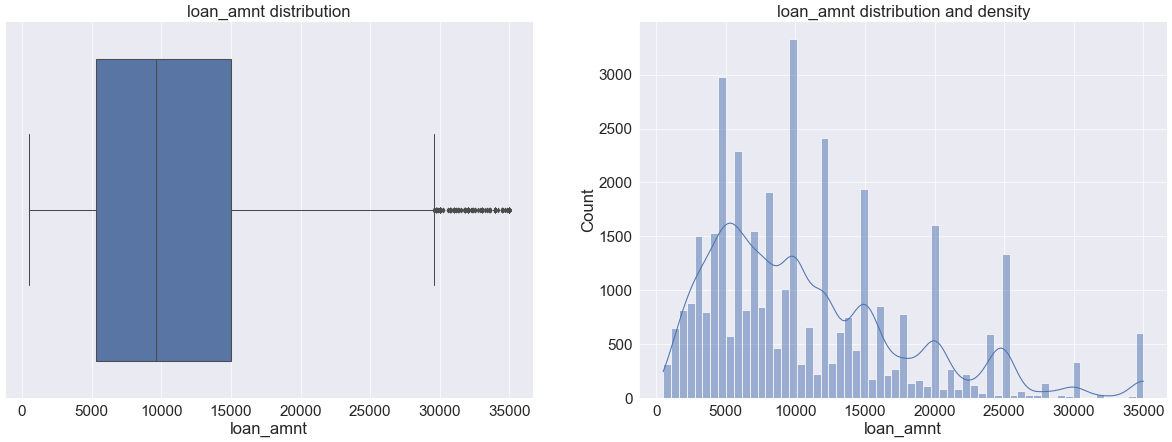

In [47]:
univariate_num('loan_amnt',loan_new)

In [48]:
# Observations
# Loan Amount
# 1. Median loan amount application is 10K 75% of values lie under 15K. We do notice outliers beyond 30K
# 2. Right skewed distribution with mean around 11K

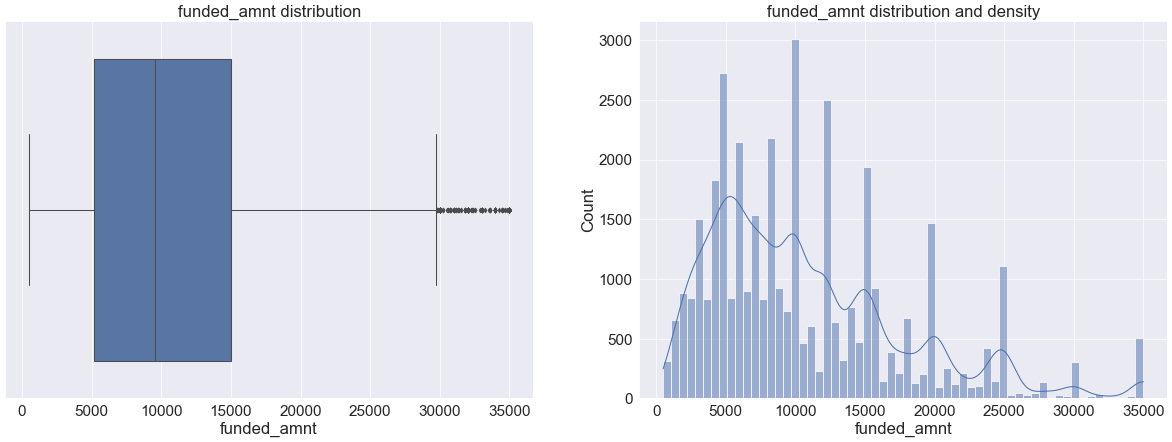

In [49]:
univariate_num('funded_amnt',loan_new)

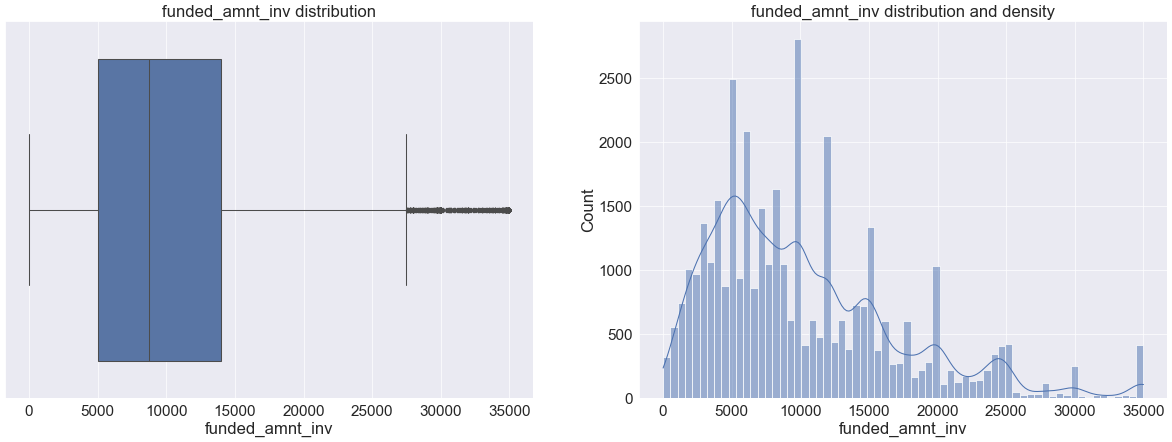

In [50]:
univariate_num('funded_amnt_inv',loan_new)

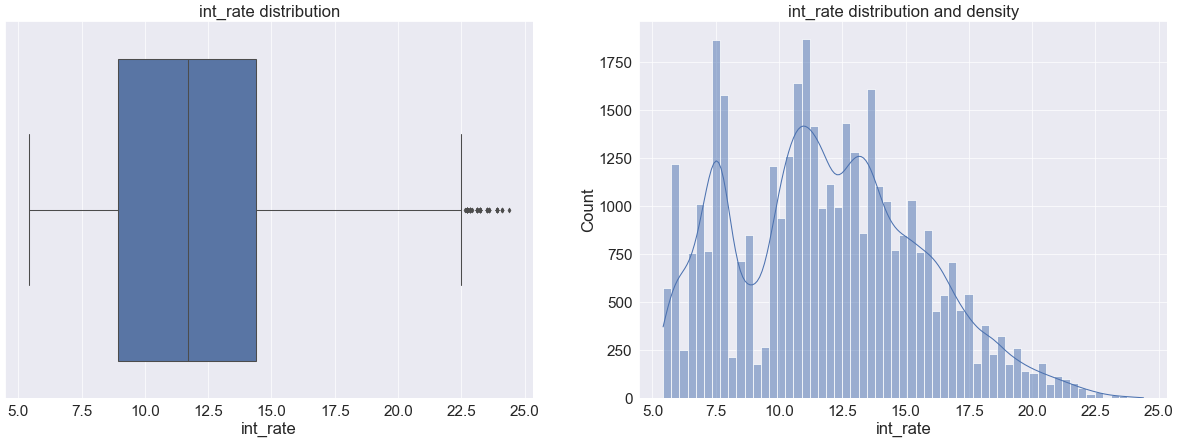

In [51]:
univariate_num('int_rate',loan_new)

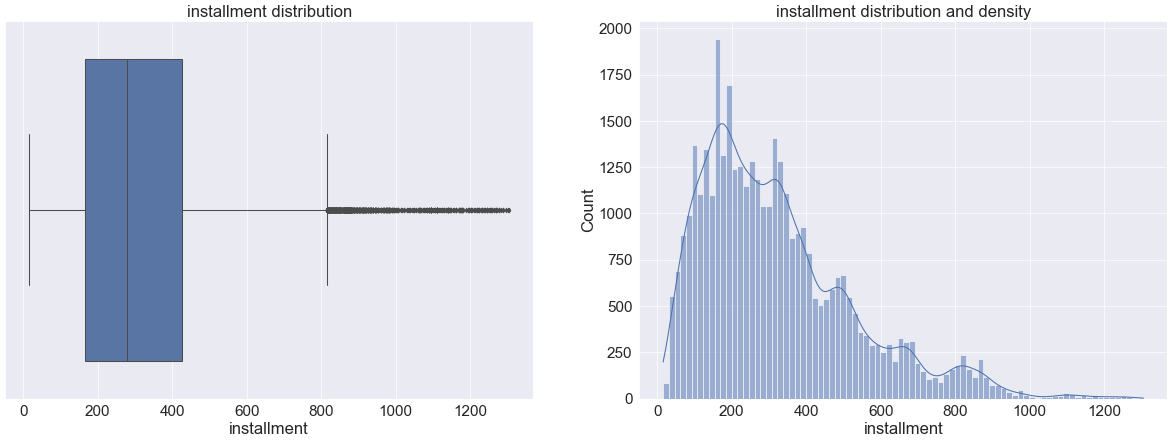

In [52]:
univariate_num('installment',loan_new)

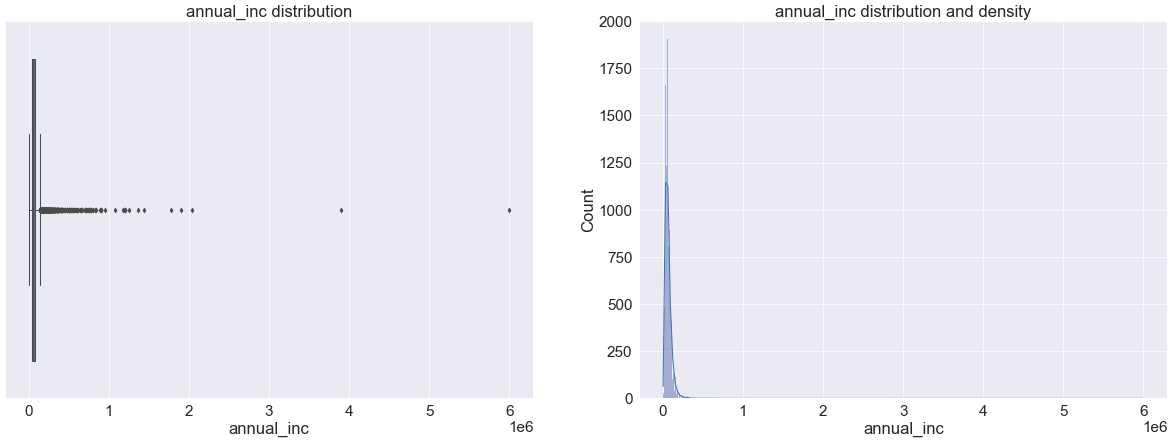

In [53]:
univariate_num('annual_inc',loan_new)

In [54]:
# Reviewing the outliers in income
loan_new[loan_new['annual_inc']>=3000000]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issuemonth
29639,672152,25000,15500,11430.00082,60,10.62,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3.0,MORTGAGE,3900000.0,Not Verified,Jun-10,Fully Paid,home_improvement,882xx,NM,0.20,0.0,Jun-2021
30107,663575,5000,5000,5000.00000,36,12.73,167.84,C,C1,post office,10.0,MORTGAGE,6000000.0,Source Verified,May-10,Fully Paid,home_improvement,939xx,CA,0.01,0.0,May-2021


In [55]:
# Removing outlier records > 3M. There seem to be additional outliers that said, eliminating high values will 
# compromise our ability to evaluate loans for high income customers
loan_new=loan_new[loan_new['annual_inc']<=3000000]

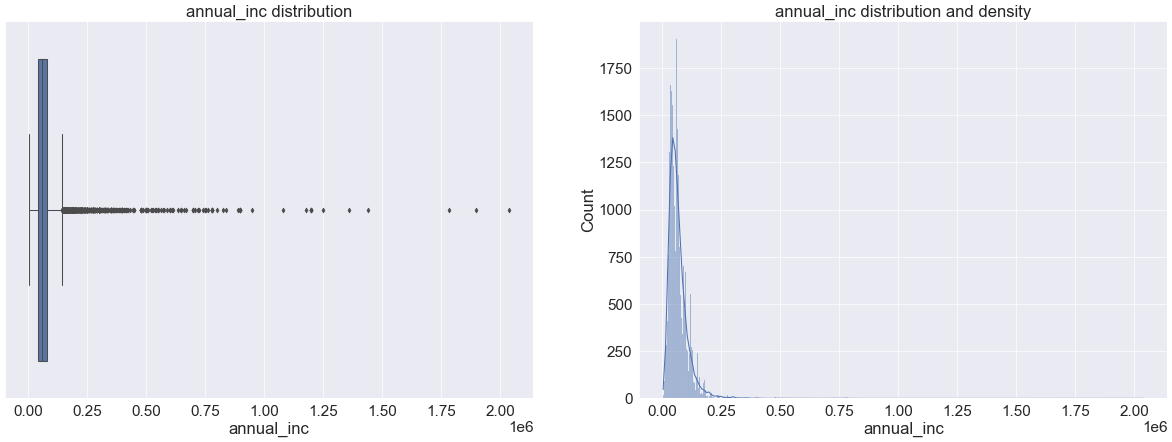

In [56]:
univariate_num('annual_inc',loan_new)

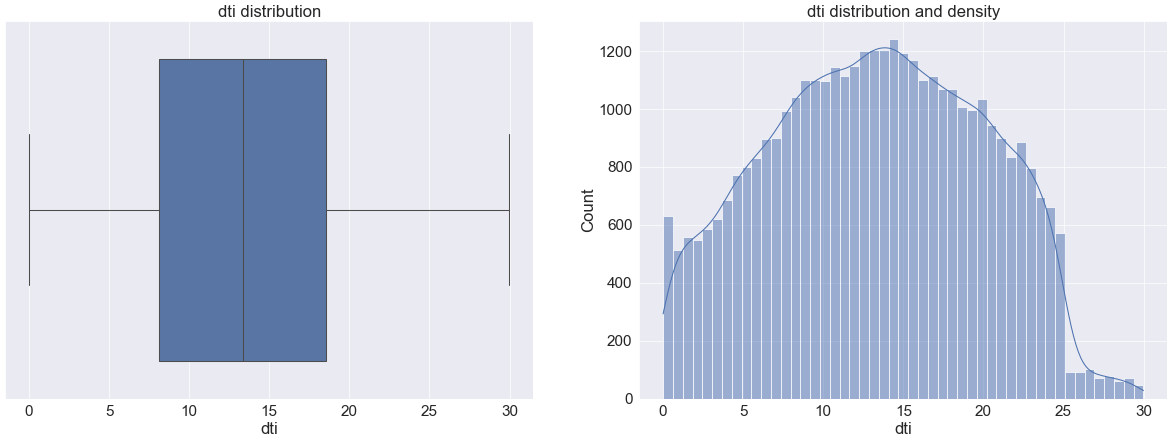

In [57]:
univariate_num('dti',loan_new)

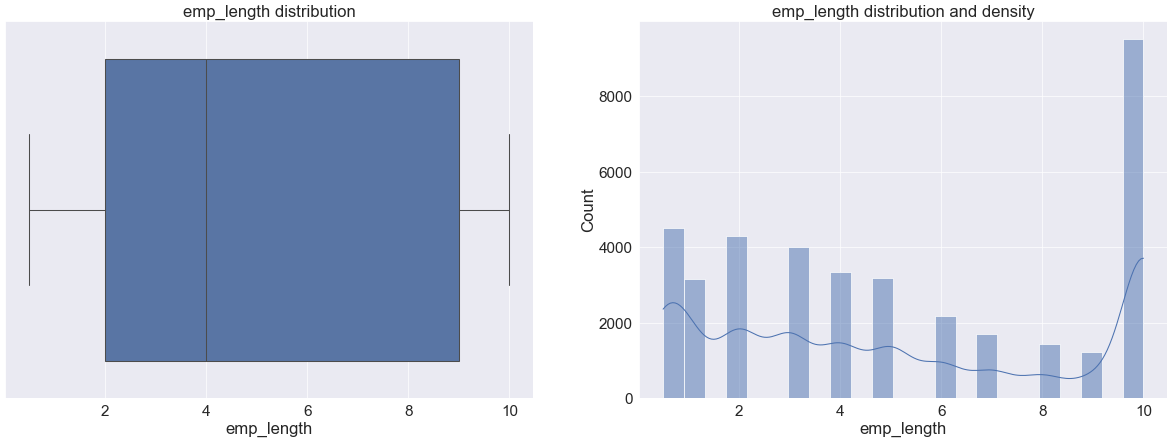

In [58]:
univariate_num('emp_length',loan_new)

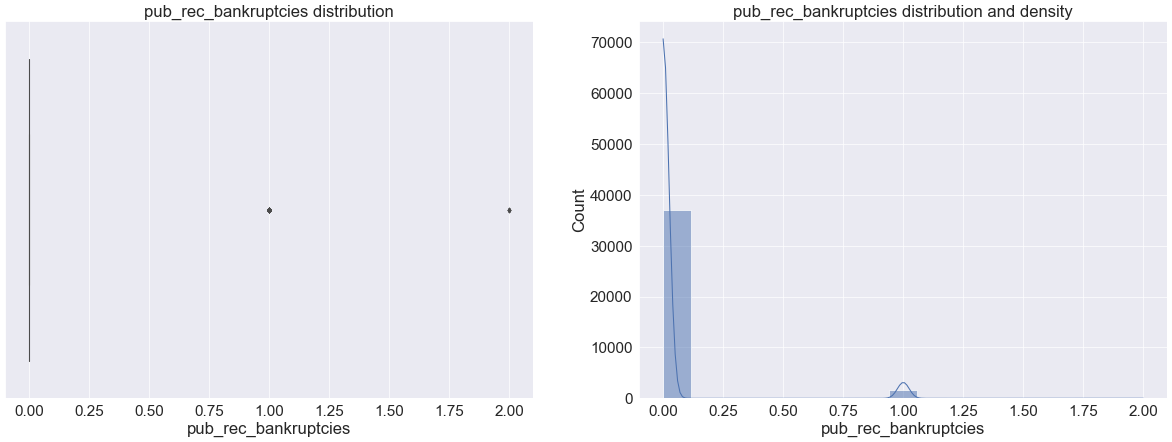

In [59]:
univariate_num('pub_rec_bankruptcies',loan_new)

In [60]:
loan_new['annual_inc_cat']= pd.qcut(loan_new['annual_inc'], q=5)

In [61]:
loan_new['emp_length_cat']= pd.cut(loan_new['emp_length'], bins= 5)

In [62]:
loan_new['int_rate_cat']= pd.cut(loan_new['int_rate'], bins= 5)

In [63]:
loan_new['loan_amnt_cat']= pd.cut(loan_new['loan_amnt'], bins= 5)

In [64]:
loan_new.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issuemonth,annual_inc_cat,emp_length_cat,int_rate_cat,loan_amnt_cat
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec-2021,"(3999.999, 37187.56]","(8.1, 10.0]","(9.216, 13.012]","(465.5, 7400.0]"
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0,Dec-2021,"(3999.999, 37187.56]","(0.49, 2.4]","(13.012, 16.808]","(465.5, 7400.0]"
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0,Dec-2021,"(3999.999, 37187.56]","(8.1, 10.0]","(13.012, 16.808]","(465.5, 7400.0]"
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0,Dec-2021,"(37187.56, 50004.0]","(8.1, 10.0]","(13.012, 16.808]","(7400.0, 14300.0]"
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0,Dec-2021,"(3999.999, 37187.56]","(2.4, 4.3]","(5.401, 9.216]","(465.5, 7400.0]"


In [65]:
# extracting a list of objects
dtype_object=loan_new.select_dtypes(include=['object']).columns.tolist()
dtype_object

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'issuemonth']

In [66]:
# Building a function to generate univariate categroies
def univariate_cat(col,loan_new):
    sns.set(font_scale=1)
    plt.figure(figsize=[10,5])
    ax=sns.countplot(x=loan_new[col], data=loan_new)
    plt.title(col+ ' distribution')
    #add_value_labels(ax)
    plt.xticks(rotation=90)
    plt.show()

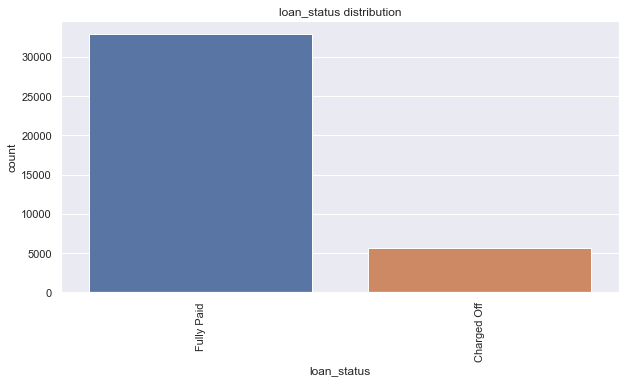

In [67]:
univariate_cat('loan_status',loan_new)

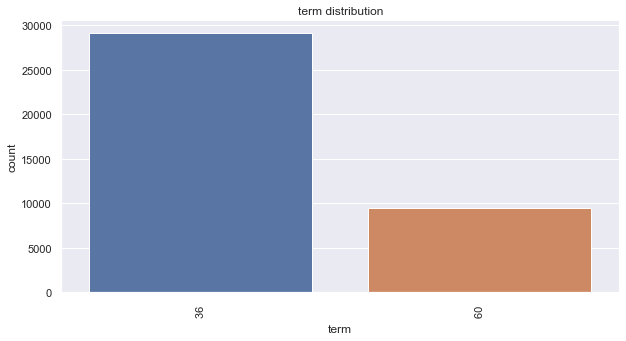

In [68]:
univariate_cat('term',loan_new)

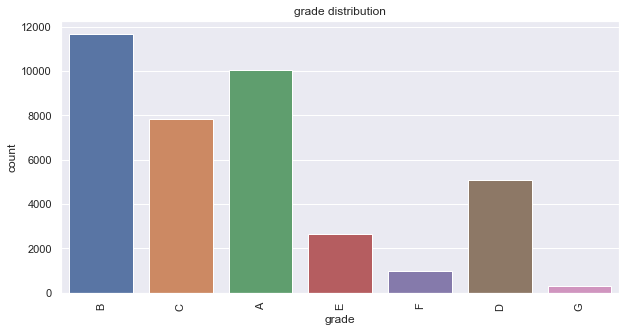

In [69]:
univariate_cat('grade',loan_new)

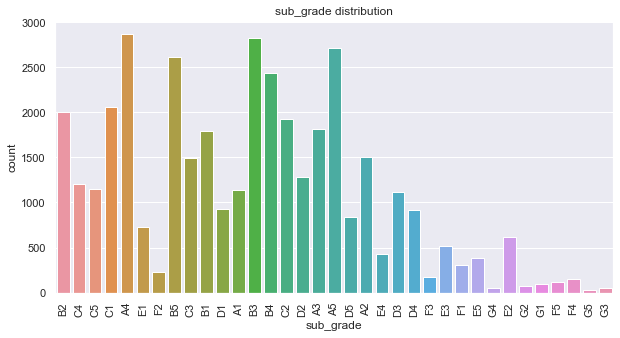

In [70]:
univariate_cat('sub_grade',loan_new)

In [71]:
print(loan_new['emp_title'].value_counts())
#univariate_cat('emp_title',loan_new)

Unknown                                  2386
US Army                                   131
Bank of America                           107
IBM                                        65
AT&T                                       57
                                         ... 
Department of Juvenile Justice              1
Cox communications Inc.                     1
Teoco Corporation/Respond.com               1
Northern Ohio Medical Specialists           1
trinity temple preschool and day care       1
Name: emp_title, Length: 28027, dtype: int64


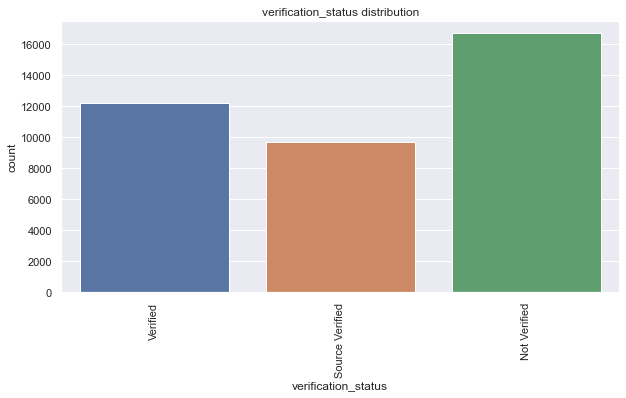

In [72]:
univariate_cat('verification_status',loan_new)

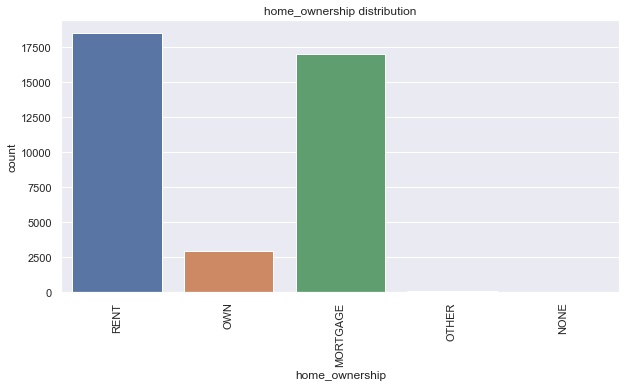

In [73]:
univariate_cat('home_ownership',loan_new)

In [74]:
print(loan_new['purpose'].value_counts())

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2873
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64


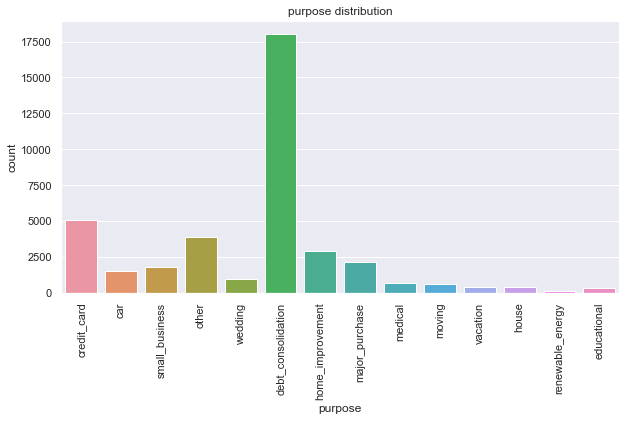

In [75]:
univariate_cat('purpose',loan_new)

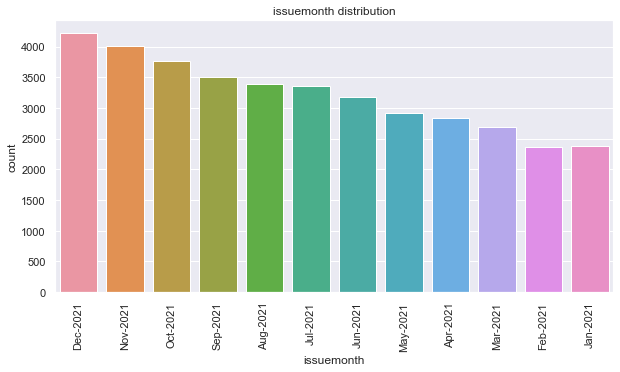

In [76]:
univariate_cat('issuemonth',loan_new)

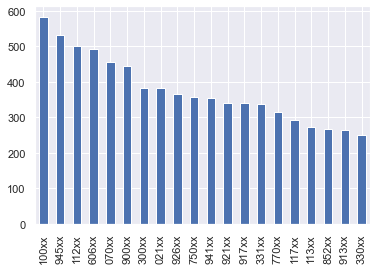

In [77]:
loan_new['zip_code'].value_counts().nlargest(20).plot.bar()

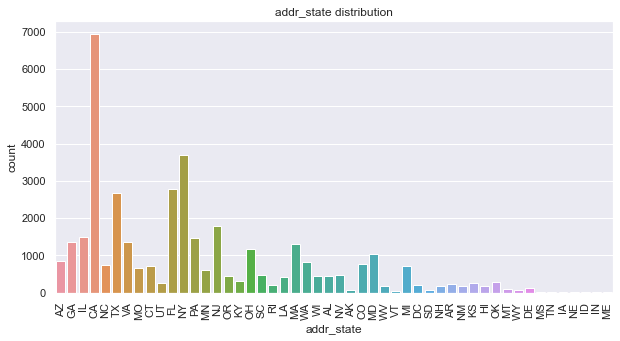

In [78]:
#loan_new['addr_state'].value_counts().nlargest(20).plot.bar()#
univariate_cat('addr_state',loan_new)

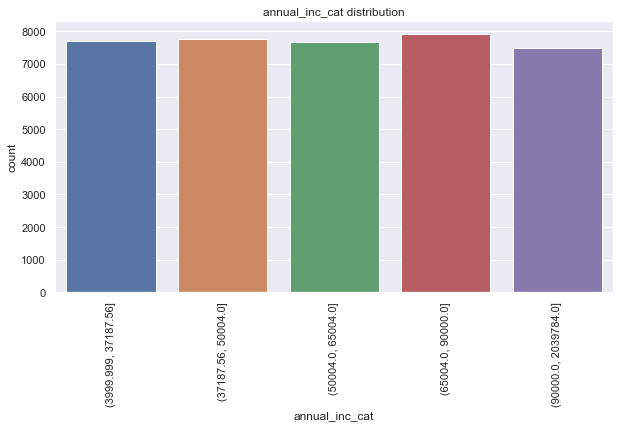

In [79]:
univariate_cat('annual_inc_cat',loan_new)

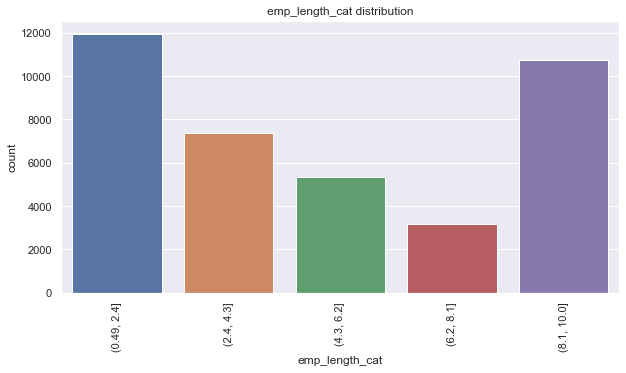

In [80]:
univariate_cat('emp_length_cat',loan_new)

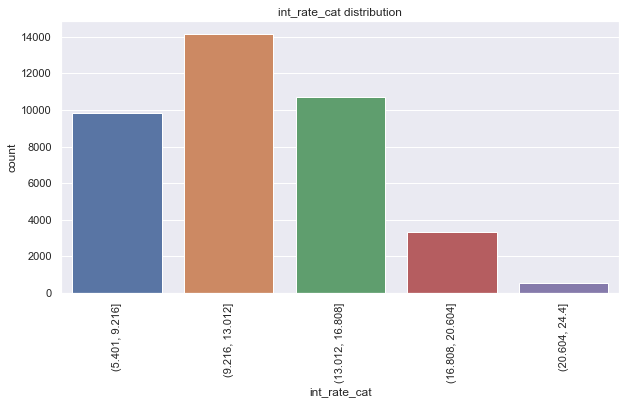

In [81]:
univariate_cat('int_rate_cat',loan_new)

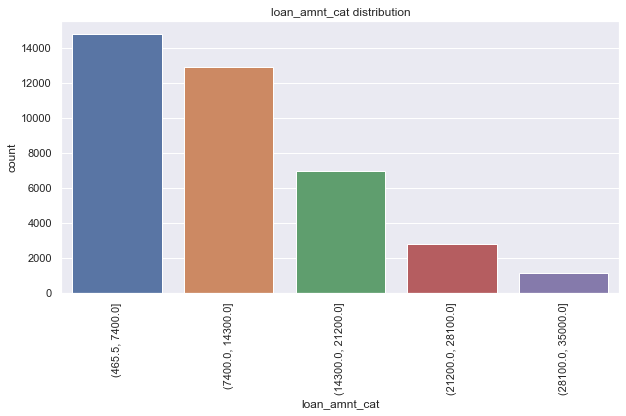

In [82]:
univariate_cat('loan_amnt_cat',loan_new)

# BIVARIATE ANALYSIS

In [83]:
# Defining a function to generate bi variate analyses between the target and the chosen categorical variables
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    sns.set(font_scale=1)
    temp = loan_new[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Applications': temp.values})

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = loan_new[[feature, 'loan_status_new']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='loan_status_new', ascending=False, inplace=True)
    sns.set_style("whitegrid")

    
    if(horizontal_layout):
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))        
    else:
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,10))
    
    sns.set_color_codes("pastel")
    sns.set_style("whitegrid")

    s = sns.barplot(ax=ax1, x = feature, y="Number of Applications",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    #s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    s = sns.barplot(ax=ax2, x = feature, y='loan_status_new', data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of charged Off [%]')
    
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show();

In [84]:
loan_new.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issuemonth', 'annual_inc_cat',
       'emp_length_cat', 'int_rate_cat', 'loan_amnt_cat'],
      dtype='object')

In [85]:
# New column addition to display the target variable as a numeric value 
loan_new['loan_status_new']= loan_new['loan_status'].map({'Charged Off':1,'Fully Paid':0})

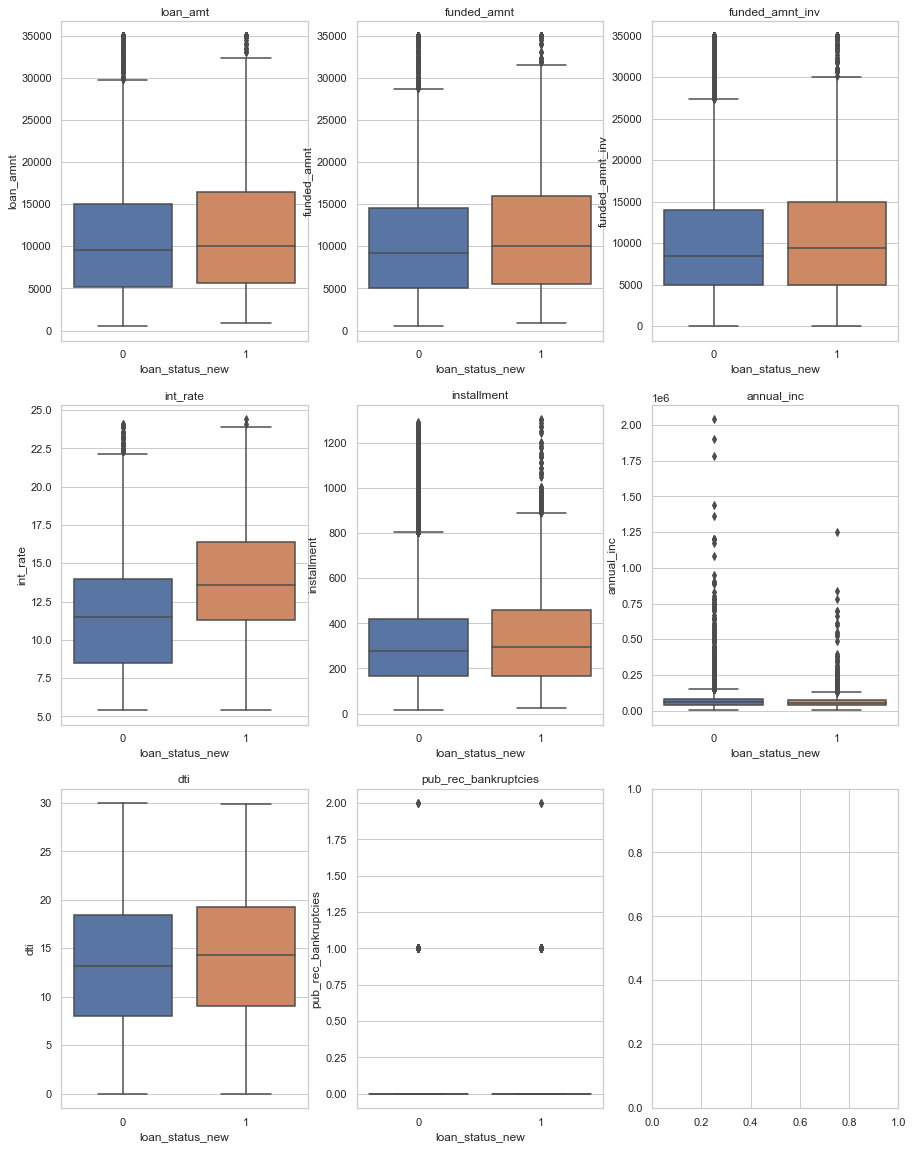

In [86]:
##plot the Box plot to check for the possible option to check the outliers
sns.set(style="whitegrid")
f, axs = plt.subplots(3,3,figsize=(15,20))
plt.subplot(3, 3, 1)
sns.boxplot(x='loan_status_new',y='loan_amnt',data=loan_new)
plt.title('loan_amt')
plt.subplot(3, 3, 2)
sns.boxplot(x='loan_status_new',y='funded_amnt',data=loan_new)
plt.title('funded_amnt')
plt.subplot(3, 3, 3)
sns.boxplot(x='loan_status_new',y='funded_amnt_inv',data=loan_new)
plt.title('funded_amnt_inv')
plt.subplot(3, 3, 4)
sns.boxplot(x='loan_status_new', y='int_rate',data=loan_new)
plt.title('int_rate')

plt.subplot(3, 3, 5)
sns.boxplot(x='loan_status_new',y='installment',data=loan_new)
plt.title('installment')

plt.subplot(3, 3, 6)
sns.boxplot(x='loan_status_new', y='annual_inc',data=loan_new)
plt.title('annual_inc')

plt.subplot(3, 3, 7)
sns.boxplot(x='loan_status_new',y='dti',data=loan_new)
plt.title('dti')

plt.subplot(3, 3, 8)
sns.boxplot(x='loan_status_new', y='pub_rec_bankruptcies',data=loan_new)
plt.title('pub_rec_bankruptcies')

plt.show()

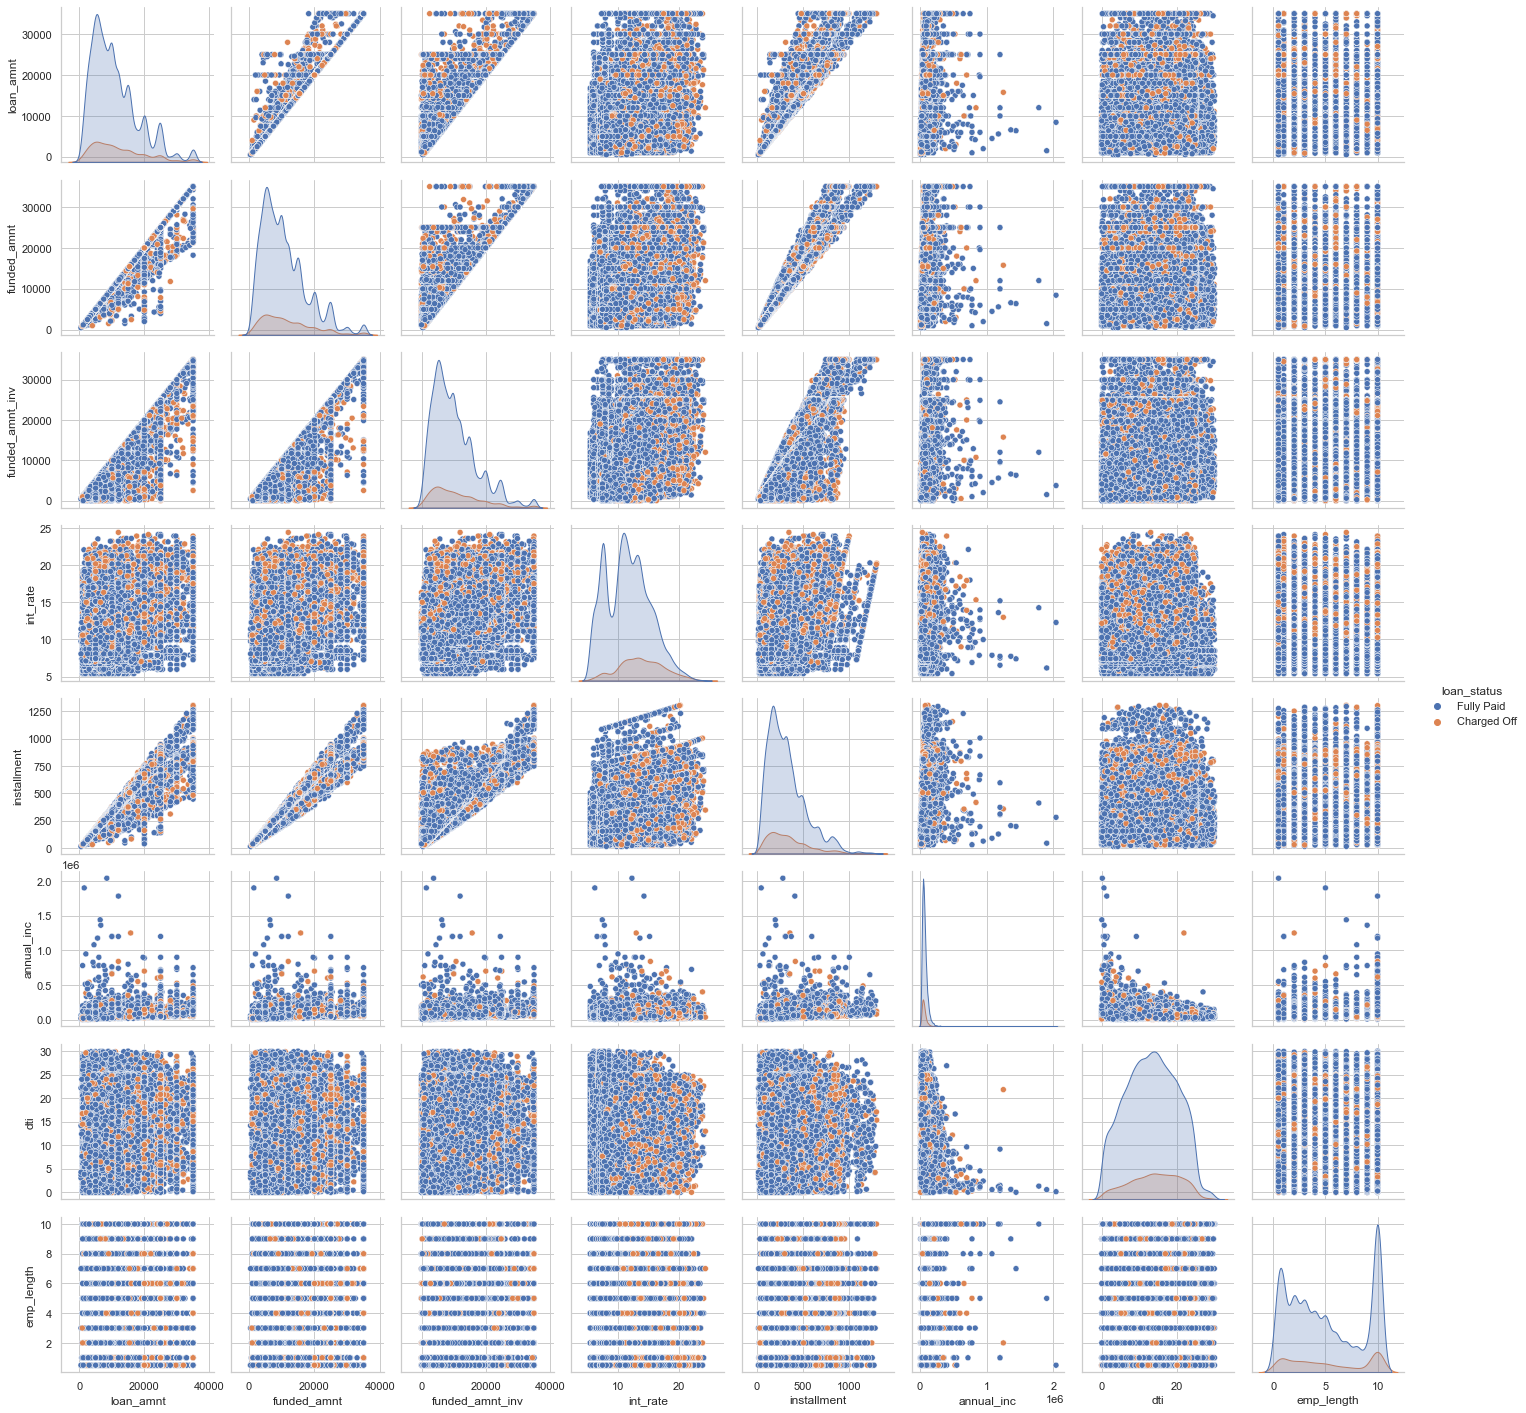

In [87]:
numericvariables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'emp_length','loan_status']
sns.pairplot(data=loan_new[numericvariables],hue="loan_status")

In [88]:
corr = loan_new.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(40)

,VAR1,VAR2,Correlation,Correlation_abs
23,funded_amnt,loan_amnt,0.98,0.98
57,installment,funded_amnt,0.96,0.96
35,funded_amnt_inv,funded_amnt,0.96,0.96
34,funded_amnt_inv,loan_amnt,0.94,0.94
56,installment,loan_amnt,0.93,0.93
58,installment,funded_amnt_inv,0.91,0.91
82,annual_inc,installment,0.33,0.33
78,annual_inc,loan_amnt,0.32,0.32
79,annual_inc,funded_amnt,0.32,0.32
80,annual_inc,funded_amnt_inv,0.31,0.31


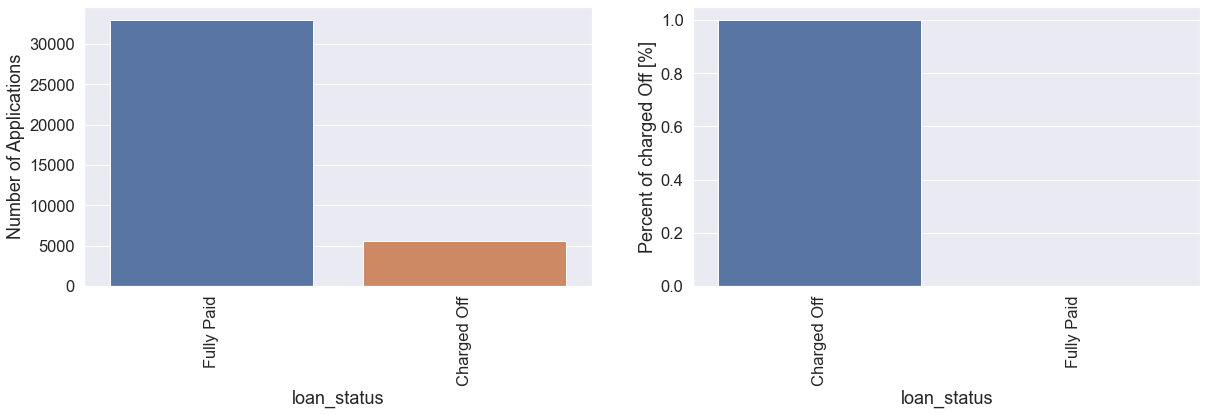

In [89]:
plot_stats('loan_status',True)

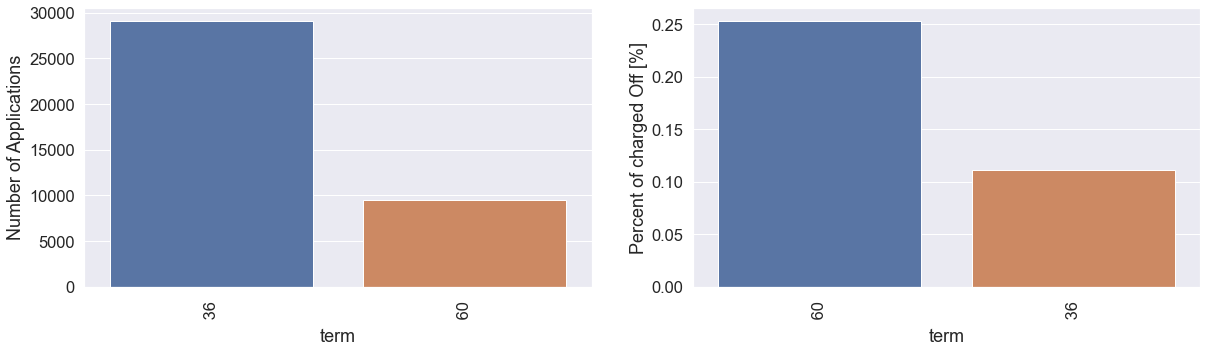

In [90]:
plot_stats('term',True)

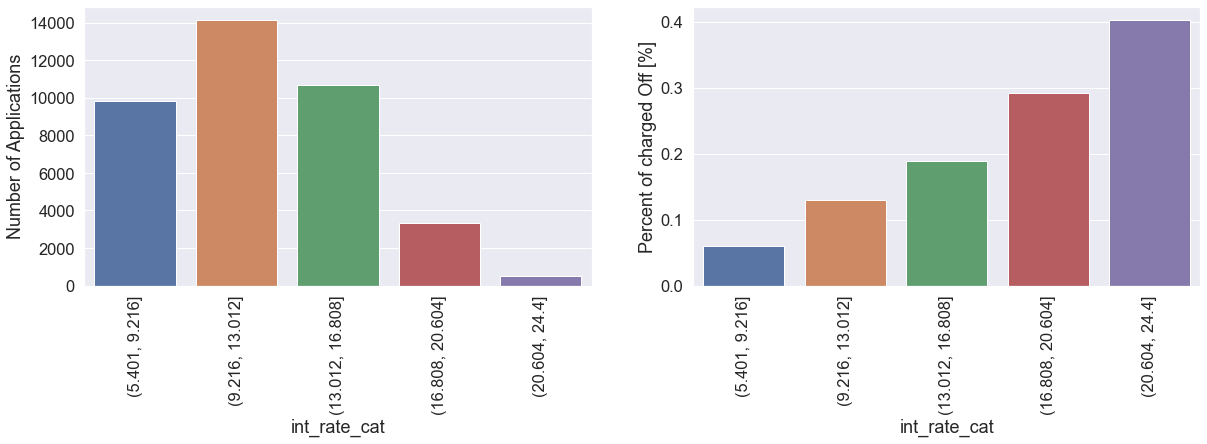

In [91]:
plot_stats('int_rate_cat',True)

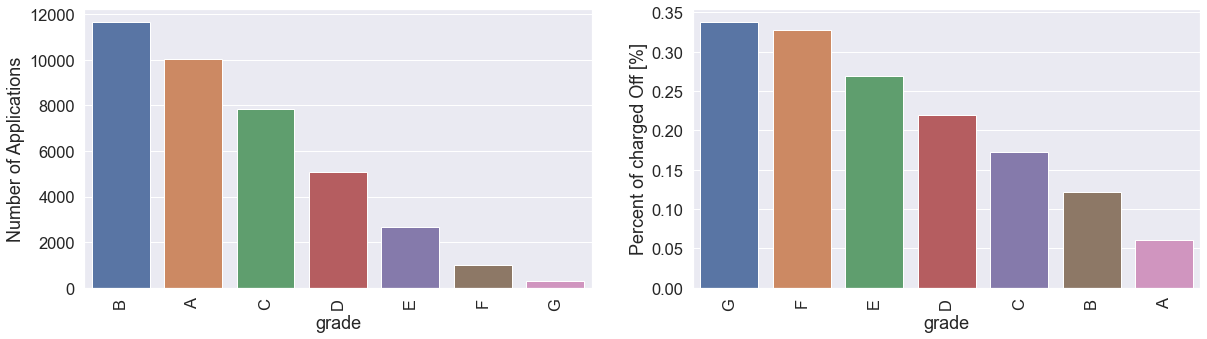

In [92]:
plot_stats('grade',True)

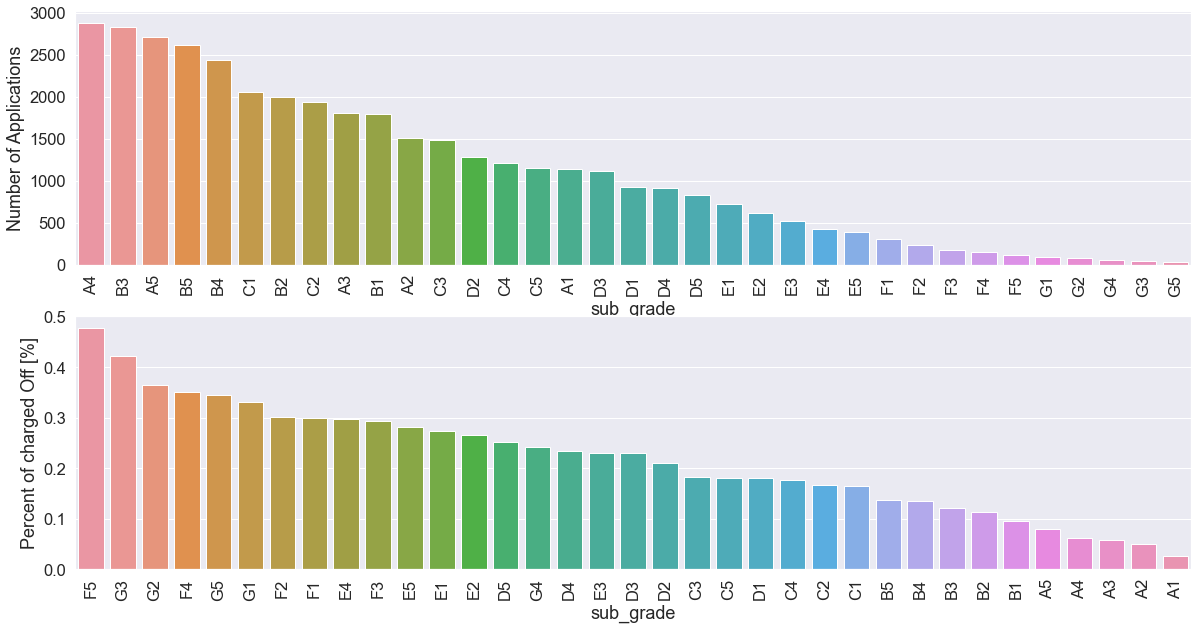

In [93]:
plot_stats('sub_grade',True,False)

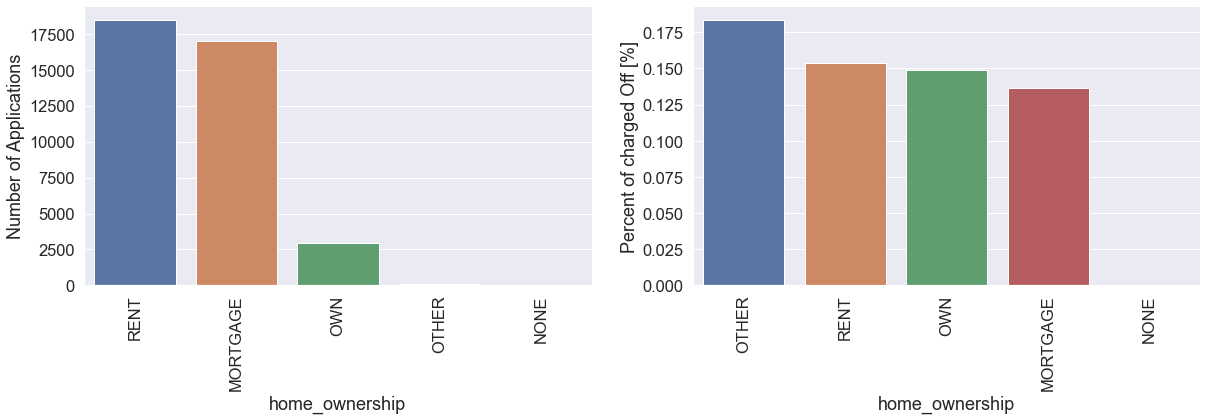

In [94]:
plot_stats('home_ownership',True)

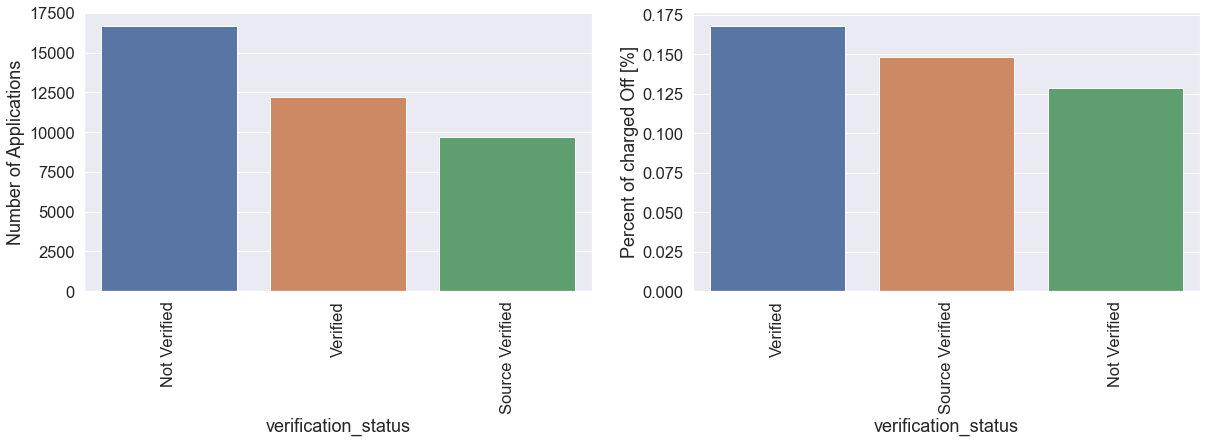

In [95]:
plot_stats('verification_status',True)

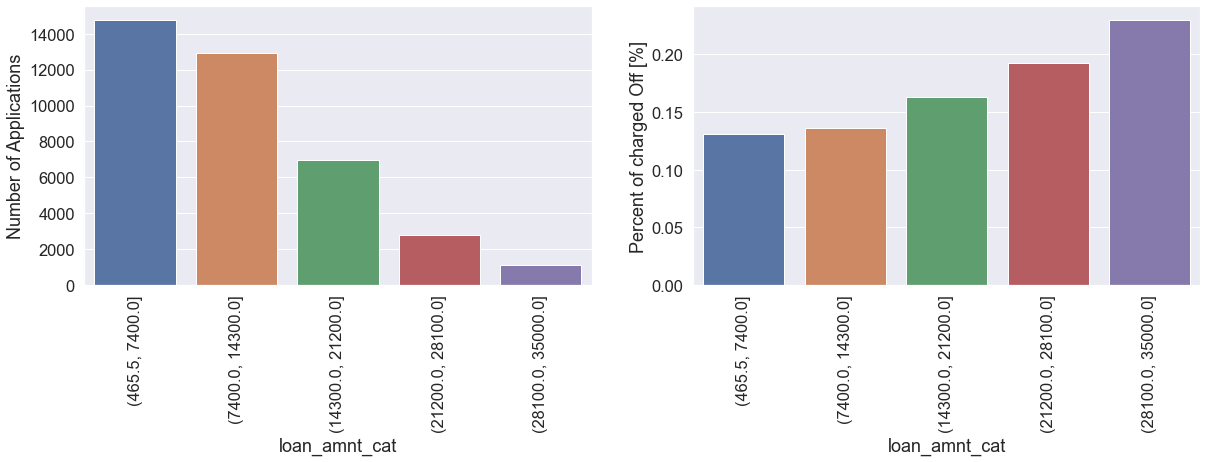

In [96]:
plot_stats('loan_amnt_cat',True)

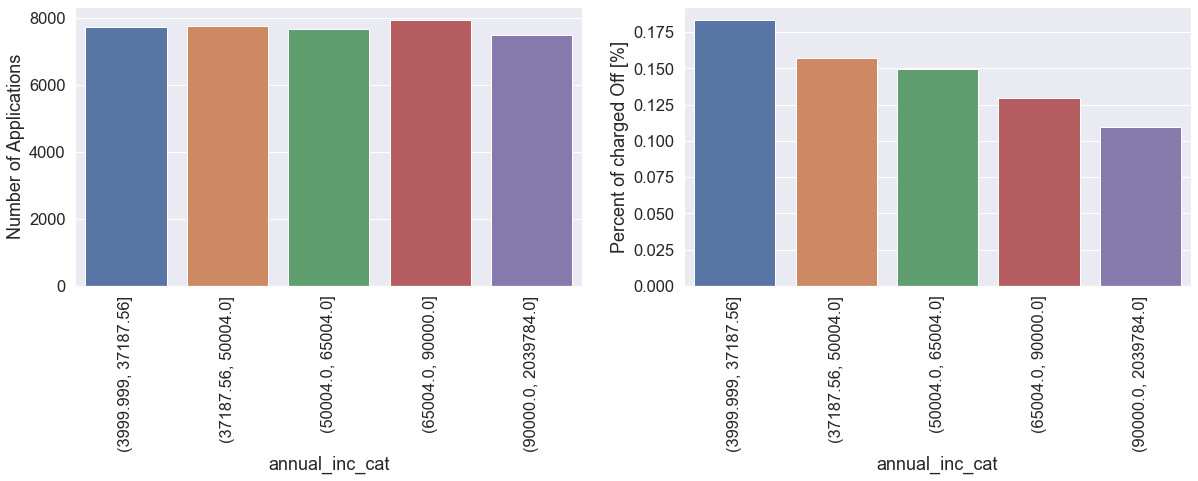

In [97]:
plot_stats('annual_inc_cat',True)

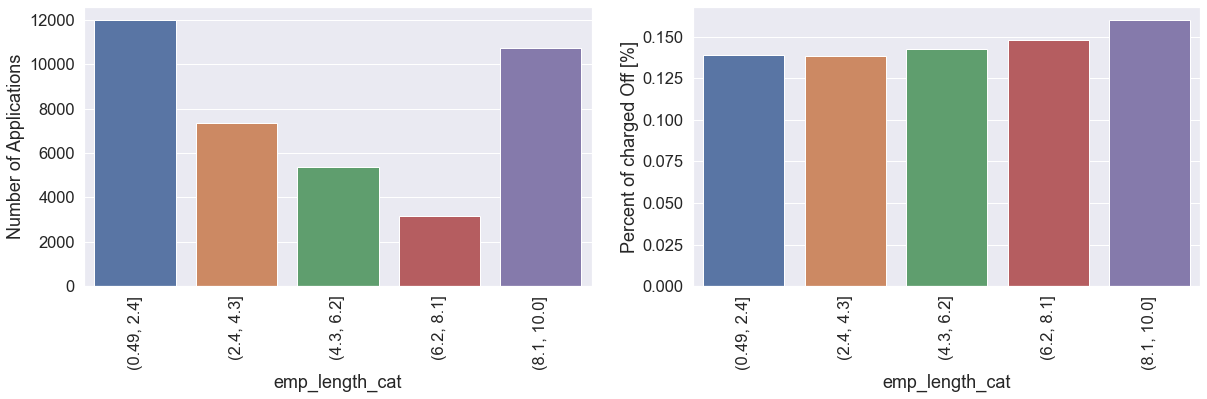

In [98]:
plot_stats('emp_length_cat',True)

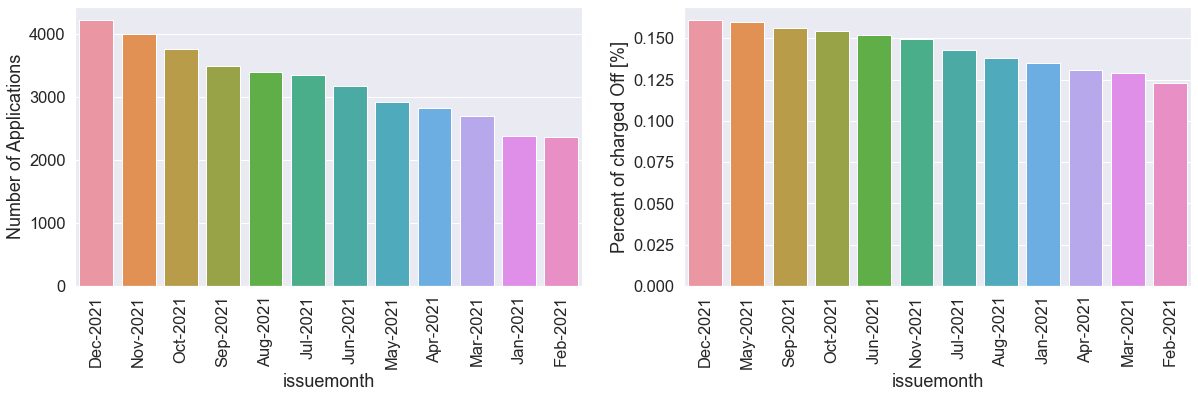

In [99]:
plot_stats('issuemonth',True)

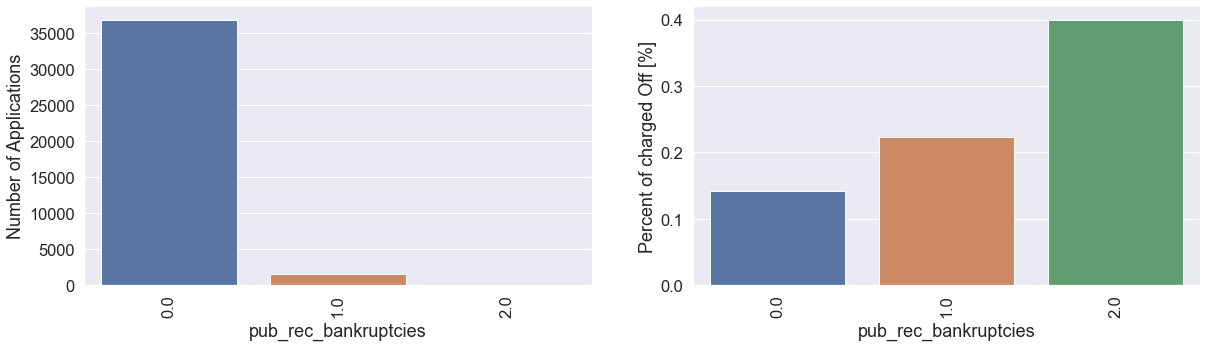

In [100]:
plot_stats('pub_rec_bankruptcies',True)

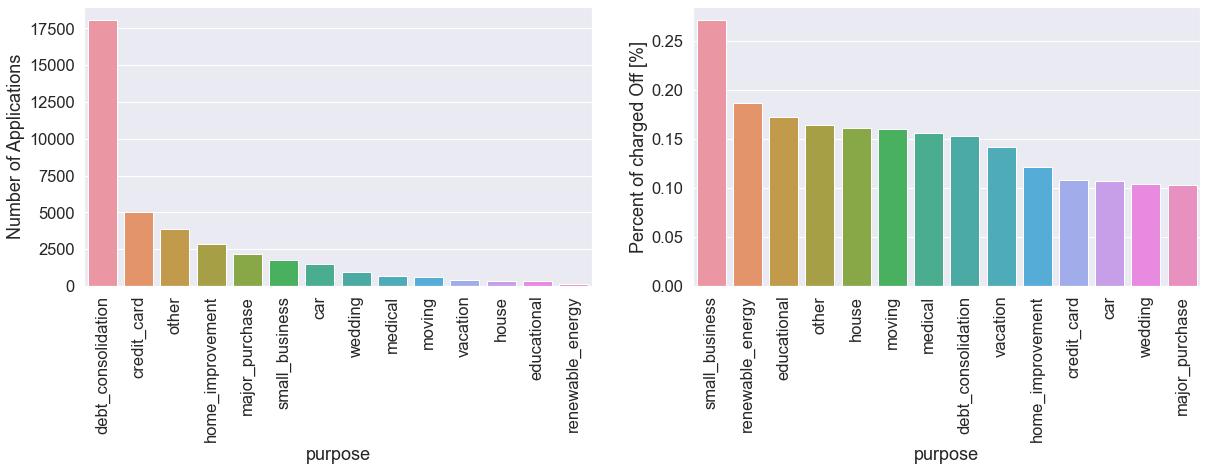

In [101]:
plot_stats('purpose',True)

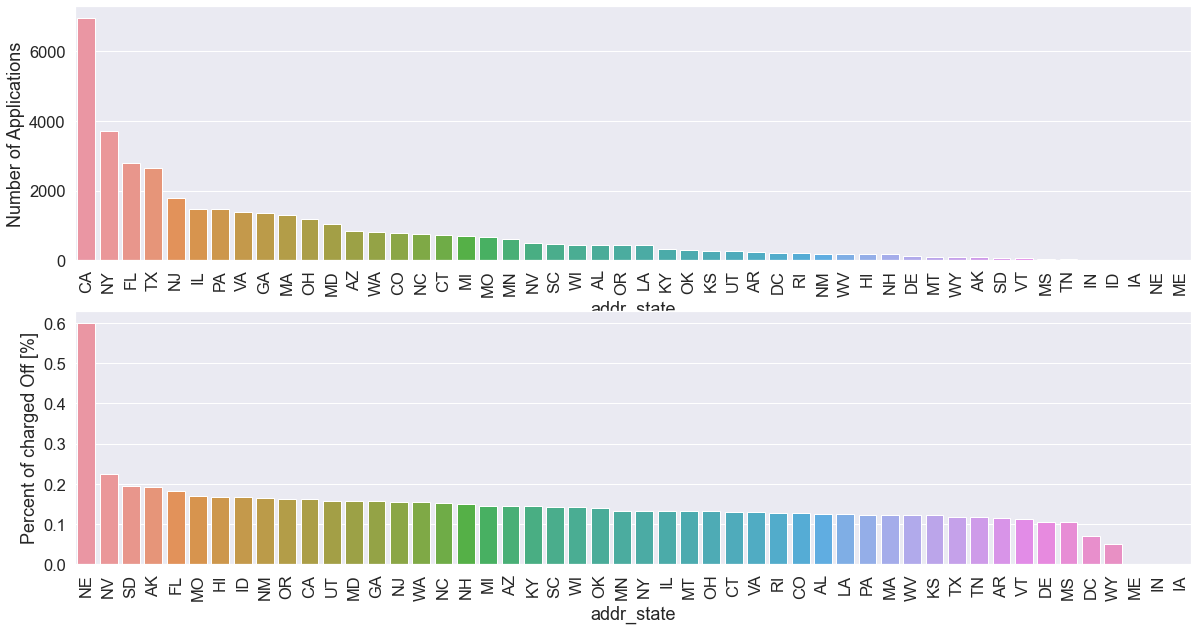

In [102]:
plot_stats('addr_state',True,False)

### CONCLUSIONS & RECOMMENDATIONS